<a href="https://colab.research.google.com/github/uendercarlos/Sistema-de-Aprovacao-de-Emprestimos-completo--ngrok-e-streamlit/blob/main/Sistema_de_Aprovacao_de_Emprestimos_completo_ngrok_e_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

font>

### <font color='GREY'> SAE - Sistema de Aprovação de Empréstimos </font>  

![](https://i.gifer.com/MKsN.gif)




# <font color='Black'> **Aula 1 - Extraindo Insights com Ciência de Dados** </font>
![](https://cbswire.dk/wp-content/uploads/2020/08/computer-bits.gif)

#1° Problema de Negócio 
![](https://s3-us-west-2.amazonaws.com/medici-prod/root/Medici/public/uploads/custom1_fintech-a-new-frontier-for-smartphone-manufacturers.gif?1607010785)

###Um grande conglomerado financeiro internacional está percebendo o potencial ainda inexplorado do mercado de crédito Brasileiro e, aproveitando a era do "**Open Banking**", está aterrizando em solo Brasileiro fundando a 

## **FINTECH "Crédito Fácil"**
![](https://www.boldbusiness.com/wp-content/uploads/2018/10/Why-Atlanta-Is-Becoming-a-Hot-Bed-for-FinTech-Feature-Image.gif)

### Percebendo o potencial dessa Fintech e, dado que o mercado Brasileiro de Crédito é bem Maduro e com índices de inadimplência bem controlado, vários investidores foram atraídos e fizeram aportes de capital, transformando a fintech numa das empresas consideradas **UNICÓRNIO**, que são aquelas com **valor de mercado na casa de Bilhões** de Reais.

![](https://miro.medium.com/max/2134/1*e7kEYciuIHfoVu-1vWx0dA.gif)

### Como toda empresa orientada a Dados (*Datadriven*), o RH da empresa está selecionando Cientistas de Dados na Prática, para que eles possam desenvolver um SISTEMA DE APROVAÇÃO DE EMPRÉSTIMO - online - com uma solução de Ciência de Dados.

### **Seu objetivo é exatamente esse:** 

Construir um Sistema de Aprovação de Empréstimos com **Machine Learning e Programação Python**, detalhando cada etapa do processo de construção da sua Máquina Preditiva.
![](https://miro.medium.com/max/2600/1*hlaNkSNjNWBDQPzIkwh82w.gif)

####**Fonte de Dados**: Para desenvolver a Máquina Preditiva com Machine Learning, foram fornecidos dados históricos de crédito dos clientes, que estão no arquivo **"clientes.csv"**.

### **Arquitetura dos Dados**

![](https://cienciadosdados.com/images/2021/maratona/ad.png)

# 2° Análise Exploratória dos Dados
![](https://cdn.dribbble.com/users/132194/screenshots/2923109/bbt-mdl-dribbble.gif)

In [ ]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importação dos Dados
clientes = pd.read_csv('clientes.csv')

In [ ]:
#Verifica as Dimensões do Arquivo
clientes.shape

(614, 13)

In [ ]:
#Verificando os primeiros registros
clientes.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Verificando as informações dos campos da tabela de dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
#Verifica se há valores Nulos/ausentes
clientes.isnull().sum()

cod_cliente              0
sexo                    13
estado_civil             3
dependentes             15
educacao                 0
empregado               32
renda                    0
renda_conjuge            0
emprestimo              22
prestacao_mensal        14
historico_credito       50
imovel                   0
aprovacao_emprestimo     0
dtype: int64

In [ ]:
#verifica se há valores duplicados
clientes.duplicated().sum()

0

### Conhecendo a Distribuição dos Dados de Cada Variável/Campo

In [ ]:
#Estatísticas descritivas das variáveis numéricas
clientes.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [ ]:
# Tabela de Frequência da Variável "aprovacao_emprestimo" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
clientes.aprovacao_emprestimo.value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

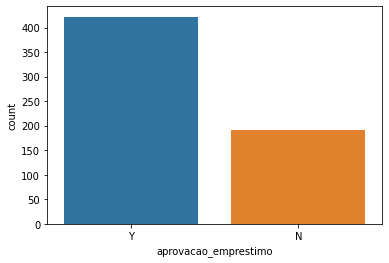

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['aprovacao_emprestimo'])

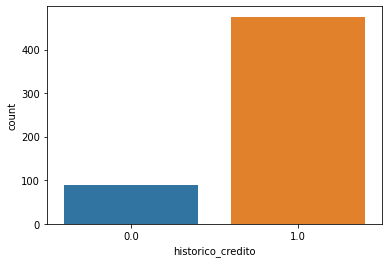

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['historico_credito'])

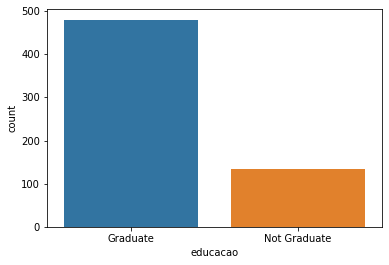

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['educacao'])

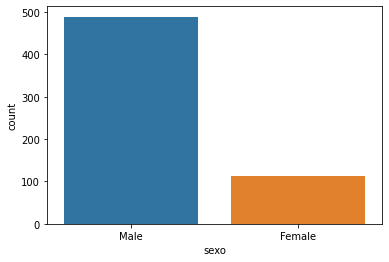

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['sexo'])

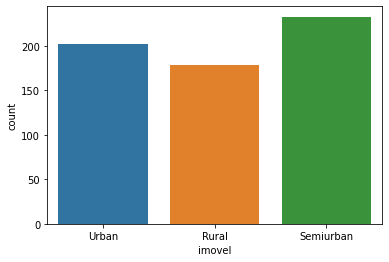

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['imovel'])

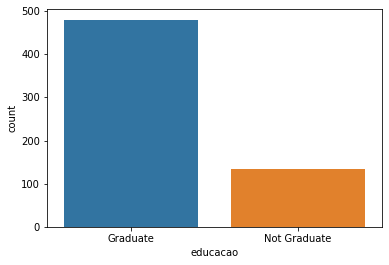

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['educacao'])

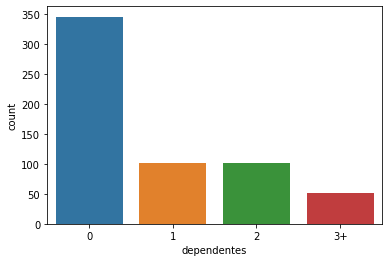

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['dependentes'])

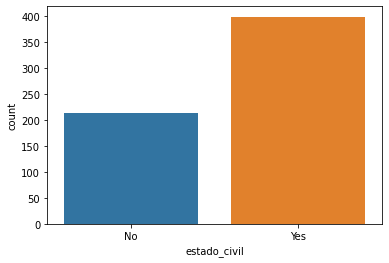

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['estado_civil'])

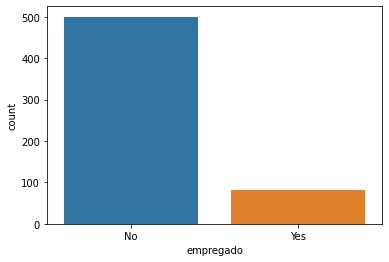

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(clientes['empregado'])

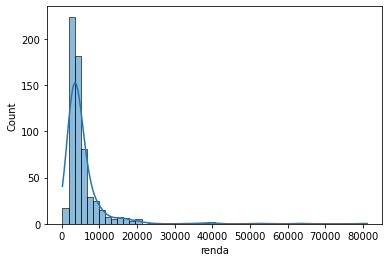

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(clientes['renda'], bins=50, kde=True)

In [ ]:
#Distribuição dos dados BOXPLOT
clientes.boxplot(column='emprestimo', vert=False )

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(clientes['emprestimo'], bins=50, kde=True)

In [ ]:
# Correlação entre as Variáveis
sns.scatterplot(data=clientes, x="emprestimo", y="renda", ) #hue='aprovacao_emprestimo')

In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(clientes, hue='aprovacao_emprestimo') # kind=reg é a reta de regressão

# 3° Pré-Processamento dos Dados
![](https://cdn.dribbble.com/users/2273038/screenshots/5193715/medical_data_visualization.gif)

In [ ]:
#Substituindo caracteres por números
clientes['sexo']= clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil']= clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [ ]:
# Eliminando valores Nulos
clientes = clientes.dropna()
clientes.isnull().sum()

cod_cliente             0
sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

In [ ]:
# Separando variáveis Explicativas e Variável TARGET
X = clientes[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = clientes.aprovacao_emprestimo
X.shape, y.shape

((480, 5), (480,))

In [ ]:
# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

In [ ]:
# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

# <font color='Black'> **Criando uma Aplicação WEB com sua Máquina Preditiva** </font>



# <font color='Blue'>6° Implementando a Maquina Preditiva  para a Fintech Crédito Fácil</font>
![](https://buhgalteru.kz/wp-content/uploads/2020/09/robot.gif)


![](https://cienciadosdados.com/images/2021/Design_sem_nome_10.png)

### **Guia Passo a Passo** para Implementação do Sistema de Aprovação de Empréstimo Online:

###### **Observação**: Caso não esteja fazendo as aulas sequencialmente e tenha desligado a sessão no Colab, reexecute o Script abaixo antes de ir para o 1°Passo.

In [ ]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")

#Importação dos Dados
clientes = pd.read_csv('/content/clientes.csv')

#Substituindo caracteres por números
clientes['sexo']= clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil']= clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

# Eliminando valores Nulos
clientes = clientes.dropna()

# Separando variáveis Explicativas e Variável TARGET
X = clientes[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = clientes.aprovacao_emprestimo
X.shape, y.shape

# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

#Importando Pacotes para Construção das Máquinas Preditivas com Machine Learning

## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier 

#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score

# Criando a Máquina Preditiva com o Random Forest 
maquina = RandomForestClassifier(max_depth=4, random_state = 7) 
maquina.fit(x_train, y_train)

#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva.pkl", mode = "wb") 
pickle.dump(maquina, pickle_out) 
pickle_out.close()

##1° Instalar o Pacote para Conexão do nosso Sistema na WEB

In [ ]:
#instalação do Pacote para Conexão do nosso Sistema na WEB 
!pip install -q pyngrok


##2° Instalar o Pacote para Implementação do nosso Sistema na WEB

In [ ]:
#instalação dos Pacotes para Implementação do nosso Sistema na WEB
!pip install -q streamlit
!pip install -q streamlit_ace


## 3° Criar o Sistema  

In [ ]:
#Comando para Criar o Sistema no arquivo app.py
%%writefile app.py

#Importando Pacotes 
import pickle
import streamlit as st
import streamlit.components.v1 as components
 
# Carregando a Máquina Preditiva
pickle_in = open('maquina_preditiva.pkl', 'rb') 
maquina_preditiva = pickle.load(pickle_in)

#Manter a sessão em cache 
@st.cache()
  
# Criando a função que irá fazer a predição usando os dados impostados pelo usuário do Sistema 
def prediction(sexo, estado_civil, renda, emprestimo, historico_credito):   
 
    # Pre-processando a entrada do Usuário    
    if sexo == "Masculino":
        sexo = 0
    else:
        sexo = 1
 
    if estado_civil == "Solteiro(a)":
        estado_civil = 0
    else:
        estado_civil = 1
 
    if historico_credito == "Débitos Pendentes":
        historico_credito = 0
    else:
        historico_credito = 1  
 
    emprestimo = emprestimo / 1000
 
    # Fazendo Predições
    prediction = maquina_preditiva.predict( 
        [[sexo, estado_civil, renda, emprestimo, historico_credito]])
     
    if prediction == 0:
        pred = 'Rejeitado'
    else:
        pred = 'Aprovado'
    return pred
      
  
# Essa função é para criação da webpage  
def main():  




    # Elementos da webpage
    # Nesse Ponto vc deve Personalizar o Sistema com sua Marca
    html_temp = """ 
                <div style ="background-color:black;padding:13px"> 
                <h1 style ="color:white;text-align:center;"></h1> 
                <h2 style ="color:white;text-align:center;">Sistema de Aprovação de Empréstimos</h2> 
                <h2 style ="color:white;text-align:center;">By Uender Carlos</h2>
                </div> 
                """

    
      
    # Função do stramlit que faz o display da webpage
    st.markdown(html_temp, unsafe_allow_html = True) 

    
    # embed streamlit docs in a streamlit app
    #components.iframe("https://docs.streamlit.io/en/latest")

      
    # As linhas abaixo criam as caixas na qual o usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
    sexo = st.selectbox('Sexo',("Masculino","Feminino"))
    estado_civil = st.selectbox('Estado Civil',("Solteiro(a)","Casado(a)")) 
    renda = st.number_input("Renda Mensal") 
    emprestimo = st.number_input("Valor Total do Empréstimo")
    historico_credito = st.selectbox('Histórico de Créditos',("Sem Débitos","Débitos Pendentes"))
    result =""
      
    #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho
    if st.button("Verificar"): 
        result = prediction(sexo, estado_civil, renda, emprestimo, historico_credito) 
        st.success('O empréstimo foi {}'.format(result))
        print(emprestimo)
     
if __name__=='__main__': 
    main()


Overwriting app.py


##4° Executar o Sistema

In [ ]:
#Executa o sistema
!streamlit run app.py &>/dev/null&

In [ ]:
#ENCERRAR TUNEL
ngrok.disconnect(public_url)

##5° Criar a Conexão do nosso Sistema na WEB

In [ ]:
# Importando a Biblioteca para Conexão do nosso Sistema na WEB 
from pyngrok import ngrok

##6° Publicar nosso Sistema numa URL

In [ ]:
#Publica o sistema numa URL
public_url = ngrok.connect('8501')

##7° Abrir o Sistema via Link que contém a palavra ngrok.io

In [ ]:
#URL do sistema
public_url

<NgrokTunnel: "http://a45f40260e58.ngrok.io" -> "http://localhost:8501">

# Fim